# Day 3
batch size 256 lr 1e-3, normed weighted, rotated, cartesian, split ny jet mult (2)

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
nJets = '2'
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish'
varSet = "filtered_rot_cart_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':30, 'compileArgs':compileArgs}

## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train_' + nJets + '.hdf5', "r+")
valData = h5py.File(dirLoc + 'val_' + nJets + '.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 0.649s 


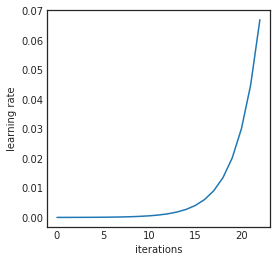

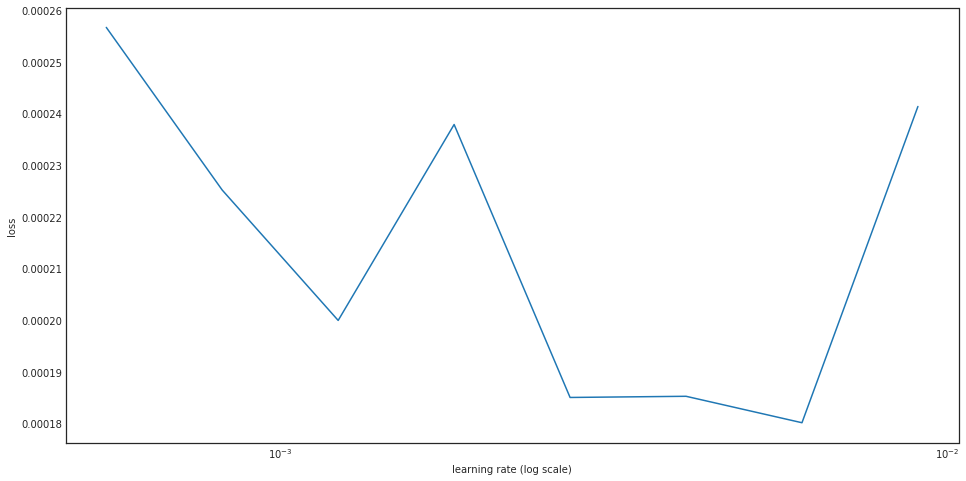

______________________________________



In [4]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [5]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 0.000186856282012
2 New best found: 0.000166168919086
3 New best found: 0.00016428379005
4 New best found: 0.000156282126256
5 New best found: 0.000147066774358
6 New best found: 0.000145898092364
7 New best found: 0.000145204975069
9 New best found: 0.000140923468326
10 New best found: 0.000139291378906
11 New best found: 0.000135123066445
12 New best found: 0.000134468082366
13 New best found: 0.000133448398918
14 New best found: 0.000133065696551
15 New best found: 0.000133004377721
19 New best found: 0.000132197712811
20 New best found: 0.000131062116451
21 New best found: 0.000129351401032
23 New best found: 0.0001270618679
24 New best found: 0.000126380772926
32 New best found: 0.000126135947738
39 New best found: 0.000125330591511
41 New best found: 0.000123417149159
50 New best found: 0.000123304548267
51 New best found: 0.000122991038973
69 New best foun

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104422). Check your callbacks.
  % delta_t_median)


1 New best found: 0.000181644540216
2 New best found: 0.000165212812351
3 New best found: 0.000161725399304
4 New best found: 0.00015473669402
5 New best found: 0.000149623550361
6 New best found: 0.000147201872271
7 New best found: 0.000146747142671
8 New best found: 0.000143011028843
10 New best found: 0.000139677019332
11 New best found: 0.000139439147635
12 New best found: 0.000135508509952
13 New best found: 0.000134501262287
14 New best found: 0.000134434328383
15 New best found: 0.000134348961804
17 New best found: 0.000133620903969
19 New best found: 0.000131106329717
21 New best found: 0.000129922870551
22 New best found: 0.00012869959244
23 New best found: 0.000128354266974
24 New best found: 0.000127032084008
25 New best found: 0.000126929134399
26 New best found: 0.000126030078113
28 New best found: 0.000125391850652
29 New best found: 0.00012527659259
39 New best found: 0.000125078265337
41 New best found: 0.000124035087957
42 New best found: 0.000123011173379
46 New best 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123330). Check your callbacks.
  % delta_t_median)


1 New best found: 0.00019177448982
2 New best found: 0.000166827088532
3 New best found: 0.00016329522165
4 New best found: 0.000151003978366
5 New best found: 0.000147361406492
6 New best found: 0.000144434213753
7 New best found: 0.00014380244945
8 New best found: 0.000140650737429
9 New best found: 0.000138181617326
10 New best found: 0.000137557934955
11 New best found: 0.000132400112167
12 New best found: 0.000131229020878
13 New best found: 0.000130115769177
14 New best found: 0.000129516978243
19 New best found: 0.000128788873105
20 New best found: 0.000126610391367
21 New best found: 0.000124827301583
22 New best found: 0.000124201853749
24 New best found: 0.00012387432221
25 New best found: 0.0001235839687
26 New best found: 0.000123158392528
27 New best found: 0.000122789368375
28 New best found: 0.00012272660407
29 New best found: 0.000122624267286
30 New best found: 0.000122518266236
31 New best found: 0.000122499179374
38 New best found: 0.000121690611898
40 New best found

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132028). Check your callbacks.
  % delta_t_median)


1 New best found: 0.000183603646748
2 New best found: 0.000163233151162
3 New best found: 0.000159920595124
4 New best found: 0.000147854983391
5 New best found: 0.000141470109008
6 New best found: 0.000139746963943
7 New best found: 0.000139264176806
9 New best found: 0.000137253153259
10 New best found: 0.000129798233808
12 New best found: 0.00012808902362
13 New best found: 0.00012597028908
14 New best found: 0.000125276262911
15 New best found: 0.000125158097326
17 New best found: 0.000124089879166
19 New best found: 0.0001214428685
22 New best found: 0.000119833015666
23 New best found: 0.000119366648162
24 New best found: 0.000119033569549
25 New best found: 0.000118722043685
28 New best found: 0.000118167461659
40 New best found: 0.000117349875097
41 New best found: 0.000116679857308
49 New best found: 0.000115907522695
50 New best found: 0.000115735173758
52 New best found: 0.000115622656184
53 New best found: 0.000115572598059
85 New best found: 0.000115308484306
113 New best 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144797). Check your callbacks.
  % delta_t_median)


1 New best found: 0.000193762881946
2 New best found: 0.000171716803763
3 New best found: 0.000166665554034
4 New best found: 0.000155043817675
5 New best found: 0.000148387159906
6 New best found: 0.000146767433188
7 New best found: 0.000146413158522
8 New best found: 0.000143437534681
9 New best found: 0.000140348480995
10 New best found: 0.00013769696009
11 New best found: 0.000134633801233
12 New best found: 0.000132109222745
13 New best found: 0.000130900704522
14 New best found: 0.000130146670126
15 New best found: 0.000130003695535
17 New best found: 0.000128693387122
19 New best found: 0.000125566263398
20 New best found: 0.000124427010146
21 New best found: 0.000123664028719
22 New best found: 0.000122103677862
23 New best found: 0.000121424729906
26 New best found: 0.000121346169939
27 New best found: 0.000120942103549
29 New best found: 0.000120874782287
30 New best found: 0.000120827460148
31 New best found: 0.000120781729829
39 New best found: 0.000120358395294
41 New best

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162873). Check your callbacks.
  % delta_t_median)


1 New best found: 0.00018833154497
2 New best found: 0.00017370082165
3 New best found: 0.000169272558891
4 New best found: 0.000157568658809
5 New best found: 0.00015194205819
6 New best found: 0.000149499036751
7 New best found: 0.000149049975023
8 New best found: 0.000145967229327
9 New best found: 0.000142658558784
10 New best found: 0.000140377168003
11 New best found: 0.000138321684871
12 New best found: 0.000136294976076
13 New best found: 0.000135051534164
14 New best found: 0.000134939757458
15 New best found: 0.000134805429967
16 New best found: 0.000134739453464
17 New best found: 0.000134505835342
20 New best found: 0.000133161645545
21 New best found: 0.000131898477033
22 New best found: 0.000130873199312
24 New best found: 0.000129846903557
27 New best found: 0.000128784278784
37 New best found: 0.000128651776156
39 New best found: 0.000128281187415
40 New best found: 0.000127546020277
45 New best found: 0.000127448738087
47 New best found: 0.00012723308013
48 New best fo

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.236993). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118839). Check your callbacks.
  % delta_t_median)


1 New best found: 0.000185875372361
2 New best found: 0.000166917450908
3 New best found: 0.000162819607793
4 New best found: 0.000153885411204
5 New best found: 0.000150438626394
6 New best found: 0.00014531388231
7 New best found: 0.000144954567966
8 New best found: 0.00013922121412
9 New best found: 0.000135656449894
10 New best found: 0.000134204121869
11 New best found: 0.000131246266006
12 New best found: 0.000129571218852
13 New best found: 0.000128750089538
14 New best found: 0.000128177427406
15 New best found: 0.000128068661982
17 New best found: 0.000125481167572
20 New best found: 0.000123380069135
22 New best found: 0.000123339710546
24 New best found: 0.000120855231585
26 New best found: 0.000119915434453
40 New best found: 0.000119690535966
42 New best found: 0.000118746871262
44 New best found: 0.00011720546095
53 New best found: 0.000116977066774
54 New best found: 0.000116910755359
80 New best found: 0.000116620989406
107 New best found: 0.000116555891929
Early stoppi

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190469). Check your callbacks.
  % delta_t_median)


1 New best found: 0.000175495110173
2 New best found: 0.000155957582662
3 New best found: 0.000152672667513
4 New best found: 0.000144669808619
5 New best found: 0.000137008594845
6 New best found: 0.000134264768104
7 New best found: 0.000133911459016
8 New best found: 0.000130582571715
9 New best found: 0.000128932407219
10 New best found: 0.000126484951143
11 New best found: 0.000125308343851
12 New best found: 0.0001226505545
13 New best found: 0.000121356696668
14 New best found: 0.000120763059763
15 New best found: 0.000120694058864
18 New best found: 0.000120679080551
19 New best found: 0.000119404818585
20 New best found: 0.000118678973069
21 New best found: 0.00011783913637
22 New best found: 0.000115947898485
23 New best found: 0.000115588906555
25 New best found: 0.000114203123235
26 New best found: 0.000113618856435
27 New best found: 0.00011358795154
28 New best found: 0.000113494955247
29 New best found: 0.000113442596895
30 New best found: 0.000113425251685
31 New best fo

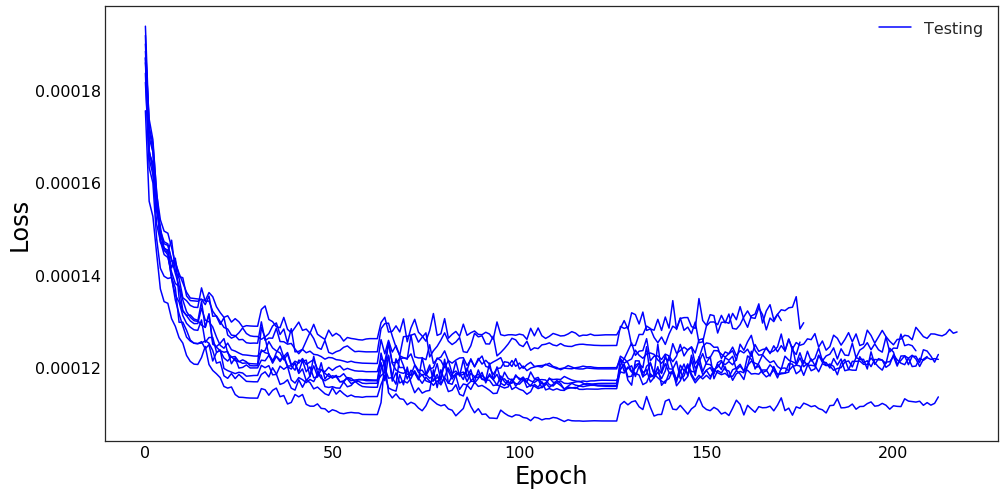

Mean wAUC = 0.071 +- 0.002
______________________________________



In [7]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=100, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [8]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [9]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 9 with loss = 0.00010836945664165567
Model 1 is 2 with loss = 0.00011359926211417064
Model 2 is 5 with loss = 0.00011530669917227299
Model 3 is 6 with loss = 0.00011540736548202332
Model 4 is 1 with loss = 0.00011603841448668224
Model 5 is 8 with loss = 0.00011655589192874322
Model 6 is 4 with loss = 0.00011827124617245767
Model 7 is 3 with loss = 0.00011972585228359248
Model 8 is 0 with loss = 0.00012232926693099634
Model 9 is 7 with loss = 0.0001255917146081439


## Response on development data

In [10]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00081168311288s per sample

Predicting batch 2 out of 10
Prediction took 0.000222704519s per sample

Predicting batch 3 out of 10
Prediction took 0.000226885059798s per sample

Predicting batch 4 out of 10
Prediction took 0.000229215227596s per sample

Predicting batch 5 out of 10
Prediction took 0.000228645594509s per sample

Predicting batch 6 out of 10
Prediction took 0.000230842709623s per sample

Predicting batch 7 out of 10
Prediction took 0.000229209738519s per sample

Predicting batch 8 out of 10
Prediction took 0.000222996557743s per sample

Predicting batch 9 out of 10
Prediction took 0.000228168881379s per sample

Predicting batch 10 out of 10
Prediction took 0.000230283705952s per sample



In [11]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.922177106975, weighted 0.946597595784


## Response on val data

In [12]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000254567497033s per sample

Predicting batch 2 out of 10
Prediction took 0.000260644050997s per sample

Predicting batch 3 out of 10
Prediction took 0.000249884853192s per sample

Predicting batch 4 out of 10
Prediction took 0.000250307302652s per sample

Predicting batch 5 out of 10
Prediction took 0.000242931772149s per sample

Predicting batch 6 out of 10
Prediction took 0.00024676224349s per sample

Predicting batch 7 out of 10
Prediction took 0.0002470826544s per sample

Predicting batch 8 out of 10
Prediction took 0.000239240054427s per sample

Predicting batch 9 out of 10
Prediction took 0.000242701234489s per sample

Predicting batch 10 out of 10
Prediction took 0.00024179031109s per sample



In [13]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.918841787621, weighted 0.931379059428


## Evaluation

### Import in dataframe

In [14]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [15]:
valData = convertToDF(valData)

14509 candidates loaded


In [16]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### MVA distributions

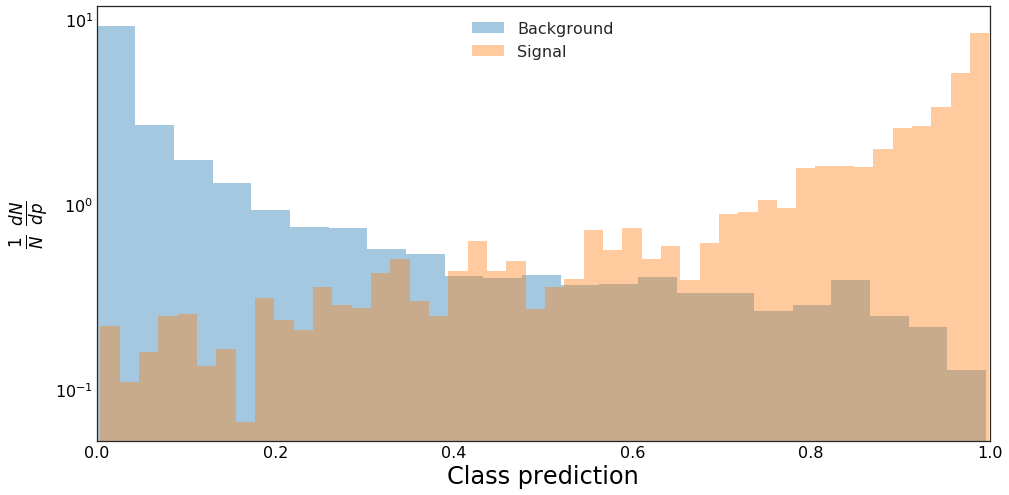

In [17]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [18]:
amsScan(valData)

[0.9629805684089661, 1.112486302963926]


[0.7844554831921708,
 0.6495447294095601,
 0.9511952750445357,
 0.948583173613967,
 0.8514717127765667,
 0.23610793598707078,
 0.5634664938690158,
 0.9517157856675296,
 0.29388103999491494,
 0.4399872546590927,
 0.7017618473156052,
 0.2881434493909208,
 0.33752796375507066,
 0.41070597692538713,
 0.48935811006561575,
 0.7266583952346115,
 0.33434438483719825,
 0.0728080705361347,
 0.5892353774543774,
 0.3192553112932574,
 1.0459836397340223,
 0.9007797348646384,
 0.6212986290310317,
 1.0505849312086464,
 0.47555892688303375,
 0.7551339512665501,
 0.43332053740288773,
 0.48928044229101,
 0.5699938262084331,
 0.18570712243893595,
 0.5984868411831721,
 0.3266509787886665,
 0.753550193242366,
 0.6374064839247905,
 0.7720539016377848,
 1.0899069103950516,
 0.29547776000734083,
 0.3048438987390191,
 1.0128491954545666,
 0.7839557928076563,
 0.9659146186395008,
 0.8052481051690615,
 0.5404664009943776,
 0.7881567608165969,
 0.7922378426032147,
 0.30566472488144925,
 0.6139005544769525,
 1.034

In [22]:
def scoreTest(ensemble, weights, nJets):
    testData = h5py.File(dirLoc + 'testing_' + nJets + '.hdf5', "r+")
    batchEnsemblePredict(ensemble, weights, testData, ensembleSize=10, verbose=1)

def saveTest(cut, name, nJets):
    testData = h5py.File(dirLoc + 'testing_' + nJets + '.hdf5', "r+")
    
    data = pandas.DataFrame()
    data['EventId'] = getFeature('EventId', testData)
    data['pred_class'] = getFeature('pred', testData)
    
    data['Class'] = 'b'
    data.loc[data.pred_class >= cut, 'Class'] = 's'

    data.sort_values(by=['pred_class'], inplace=True)
    data['RankOrder']=range(1, len(data)+1)
    data.sort_values(by=['EventId'], inplace=True)

    print dirLoc + name + '_test.csv'
    data.to_csv(dirLoc + name + '_test.csv', columns=['EventId', 'RankOrder', 'Class'], index=False)

In [23]:
scoreTest(ensemble, weights, nJets)

Predicting batch 1 out of 10
Prediction took 0.000241896277296s per sample

Predicting batch 2 out of 10
Prediction took 0.000229810332847s per sample

Predicting batch 3 out of 10
Prediction took 0.00022934714896s per sample

Predicting batch 4 out of 10
Prediction took 0.000227793549595s per sample

Predicting batch 5 out of 10
Prediction took 0.000226408732657s per sample

Predicting batch 6 out of 10
Prediction took 0.000227681762504s per sample

Predicting batch 7 out of 10
Prediction took 0.000227535254116s per sample

Predicting batch 8 out of 10
Prediction took 0.000226381872786s per sample

Predicting batch 9 out of 10
Prediction took 0.000227399819975s per sample

Predicting batch 10 out of 10
Prediction took 0.000232481506804s per sample



In [ ]:
saveTest(0.9629805684089661, 'Day_2_Basic_Features_256_1e-3_swish_mult2_200E_normedweighted_rot_cart')

!kaggle competitions submit -c higgs-boson -f ../Data/Day_2_Basic_Features_256_1e-3_swish_mult2_200E_normedweighted_rot_cart_test.csv -m"Day2"